Importing Data

In [101]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\Users\USER\Documents\Alex The Analyst\EXCEL\tourism_dataset.csv") 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.options.display.float_format = '{:,.2f}'.format
print(data)

        Location    Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR      India      Nature    948853    1.32  84,388.38   
1     aHKUXhjzTo        USA  Historical    813627    2.01 802,625.60   
2     dlrdYtJFTA     Brazil      Nature    508673    1.42 338,777.11   
3     DxmlzdGkHK     Brazil  Historical    623329    1.09 295,183.60   
4     WJCCQlepnz     France    Cultural    124867    1.43 547,893.24   
5     IKdhVWFKRc      Egypt    Cultural    389886    2.19 943,411.34   
6     TKEPcTbQFY      China       Beach    416933    3.92 744,983.22   
7     TjmJpYuNne      China  Historical    652046    2.50 796,172.02   
8     OcCopAsiyJ  Australia    Cultural     59309    4.10 588,988.55   
9     pXDJPYzTeU      India   Adventure    319068    1.98 239,590.44   
10    dUCLjskBYA  Australia       Urban     25568    4.20 941,320.46   
11    SqaAyIDkbd      China    Cultural    310407    1.76 152,734.82   
12    JtZrdaVVxi  Australia       Urban    767695    1.06 653,15

Data Cleaning

In [27]:
#Column location is not needed in the data, so we can remove that column.
data.drop(columns = ['Location'],inplace = True)
print(data)

        Country    Category  Visitors  Rating    Revenue  \
0         India      Nature    948853    1.32  84,388.38   
1           USA  Historical    813627    2.01 802,625.60   
2        Brazil      Nature    508673    1.42 338,777.11   
3        Brazil  Historical    623329    1.09 295,183.60   
4        France    Cultural    124867    1.43 547,893.24   
5         Egypt    Cultural    389886    2.19 943,411.34   
6         China       Beach    416933    3.92 744,983.22   
7         China  Historical    652046    2.50 796,172.02   
8     Australia    Cultural     59309    4.10 588,988.55   
9         India   Adventure    319068    1.98 239,590.44   
10    Australia       Urban     25568    4.20 941,320.46   
11        China    Cultural    310407    1.76 152,734.82   
12    Australia       Urban    767695    1.06 653,154.24   
13        Egypt   Adventure    797939    2.21 593,518.54   
14    Australia      Nature    677168    3.41 989,416.73   
15    Australia       Beach    520163   

In [28]:
#Checking whether there are null values in the data. 
r = data.isnull().sum() 
r 
#Here there are no null values in the data.

Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
dtype: int64

In [29]:
duplicated_rows = data.duplicated().sum()
print(duplicated_rows)

0


In [30]:
print(data.dtypes)

Country                     object
Category                    object
Visitors                     int64
Rating                     float64
Revenue                    float64
Accommodation_Available     object
dtype: object


In [31]:
#Converting datatypes
data['Accommodation_Available'] = data['Accommodation_Available'].astype('string')
data['Country'] = data['Country'].astype('string')
data['Category'] = data['Category'].astype('string')
print(data.dtypes)

Country                    string[python]
Category                   string[python]
Visitors                            int64
Rating                            float64
Revenue                           float64
Accommodation_Available    string[python]
dtype: object


In [32]:
Category_based_revenue = data.pivot_table(
    values = 'Revenue',
    index = 'Category',
    columns = 'Country',
    aggfunc = 'sum')
Category_based_revenue

    

Country,Australia,Brazil,China,Egypt,France,India,USA
Category,,,,,,,
Adventure,"73,143,074.22","77,333,822.40","62,835,395.80","82,950,318.40","58,126,792.90","78,370,335.87","69,406,465.01"
Beach,"71,734,255.42","63,899,164.12","68,741,200.34","77,755,196.13","69,845,116.72","83,256,415.38","62,016,423.75"
Cultural,"66,860,675.16","76,042,841.46","69,177,870.10","77,438,684.31","74,008,400.22","78,545,467.98","76,058,080.68"
Historical,"69,513,402.10","73,418,486.47","66,453,400.60","78,510,790.60","63,304,545.83","65,788,358.97","67,623,602.79"
Nature,"67,405,458.04","61,582,499.48","68,768,453.44","64,323,505.07","75,674,952.86","68,835,947.02","70,669,239.05"
Urban,"64,006,467.32","74,506,386.34","62,456,057.97","79,616,298.02","69,566,833.74","79,879,774.13","81,931,474.27"


In [60]:
#Converting pivot table to a dataframe
Country_Revenue = data.pivot_table(
    values = 'Revenue',
    columns = 'Country',
    aggfunc = 'sum')
Country_Revenue = Country_Revenue.T.reset_index()
Country_Revenue.columns = ['Country','Revenue']
Country_Revenue['Revenue'] = Country_Revenue['Revenue'].astype("int")
Country_Revenue

,Country,Revenue
0,Australia,412663332
1,Brazil,426783200
2,China,398432378
3,Egypt,460594792
4,France,410526642
5,India,454676299
6,USA,427705285


In [65]:
Country_Visitors = data.pivot_table(
    values = 'Visitors',
    columns = 'Country',
    aggfunc = 'sum')
Country_Visitors = Country_Visitors.T.reset_index()
Country_Visitors

,Country,Visitors
0,Australia,416038005
1,Brazil,414293518
2,China,404448372
3,Egypt,458573652
4,France,424944621
5,India,451083005
6,USA,431204187


In [ ]:
#We can see that Egypt has the most number of visitors and China has the least. Let's see if there's a correlation between number of visitors and revenue 
#generated by the country.

In [72]:
result = pd.merge(Country_Revenue,Country_Visitors , how='inner', on='Country')
result

,Country,Revenue,Visitors
0,Australia,412663332,416038005
1,Brazil,426783200,414293518
2,China,398432378,404448372
3,Egypt,460594792,458573652
4,France,410526642,424944621
5,India,454676299,451083005
6,USA,427705285,431204187


In [114]:
Category_Revenue = data.pivot_table(
    values = 'Revenue',
    columns = 'Category',
    aggfunc = 'mean')
Category_Revenue = Category_Revenue.T.reset_index()
Category_Revenue

,Category,Revenue
0,Adventure,"484,248.99"
1,Beach,"498,244.26"
2,Cultural,"519,170.36"
3,Historical,"487,537.81"
4,Nature,"499,226.00"
5,Urban,"508,909.83"


In [134]:
Category_Rating = data.pivot_table(
    values = 'Rating',
    columns = 'Category',
    aggfunc = 'mean')
Category_Rating = Category_Rating.T.reset_index()
Category_Rating

,Category,Rating
0,Adventure,3.01
1,Beach,3.07
2,Cultural,3.00
3,Historical,3.00
4,Nature,2.98
5,Urban,3.00


In [135]:
Category_Visitors = data.pivot_table(
    values = 'Visitors',
    columns = 'Category',
    aggfunc = 'mean')
Category_Visitors = Category_Visitors.T.reset_index()
Category_Visitors

,Category,Visitors
0,Adventure,"510,089.19"
1,Beach,"496,104.01"
2,Cultural,"496,827.99"
3,Historical,"498,951.90"
4,Nature,"490,947.88"
5,Urban,"512,298.58"


In [136]:
resultant = pd.merge(Category_Rating,Category_Visitors , how='inner', on='Category')
resultant

,Category,Rating,Visitors
0,Adventure,3.01,"510,089.19"
1,Beach,3.07,"496,104.01"
2,Cultural,3.00,"496,827.99"
3,Historical,3.00,"498,951.90"
4,Nature,2.98,"490,947.88"
5,Urban,3.00,"512,298.58"


<Axes: xlabel='Country', ylabel='Revenue'>

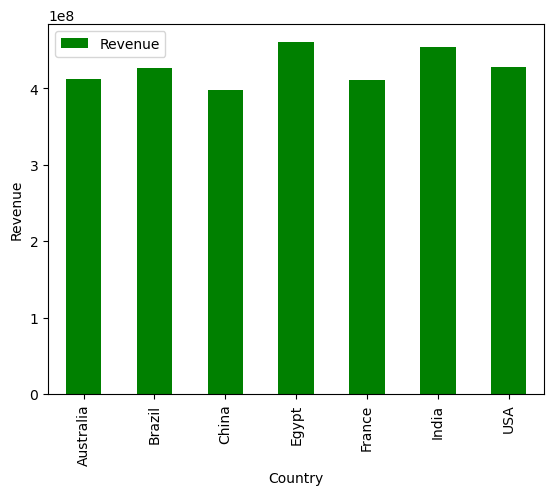

In [116]:
Country_Revenue.plot(x = "Country",y = "Revenue",kind = "bar",xlabel = "Country",ylabel = "Revenue",color = "Green",legend = "False")

<Axes: xlabel='Country', ylabel='Visitors'>

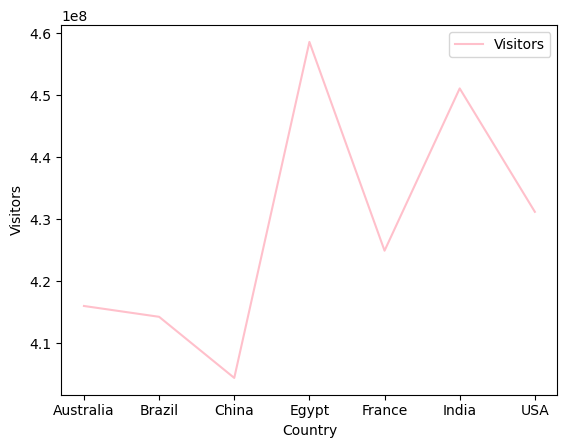

In [117]:
Country_Visitors.plot(x = "Country",y = "Visitors",xlabel = "Country",ylabel = "Visitors",kind = "line",color = "pink",legend = True)

Correlation between Rating and Visitors: -0.0670204284663114


<Axes: xlabel='Rating', ylabel='Visitors'>

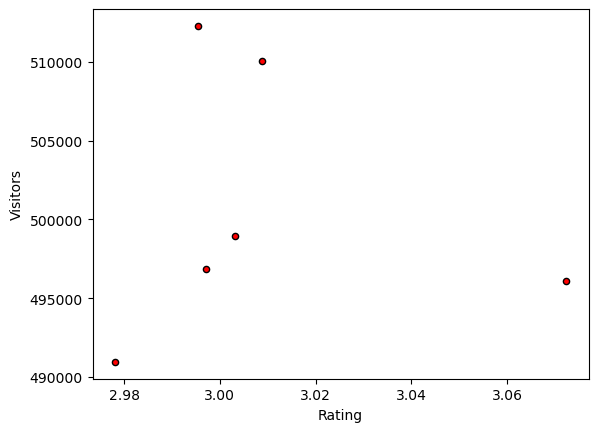

In [128]:
# Calculate the correlation between 'X' and 'Y'
correlation1 = resultant['Rating'].corr(resultant['Visitors'])
print(f"Correlation between Rating and Visitors: {correlation1}")

# Plot the scatter plot
resultant.plot(kind='scatter', x='Rating', y='Visitors',xlabel = 'Rating',ylabel = 'Visitors', color='red', edgecolor='black')

In [140]:
#Calculating the new correlation coefficient
# Assuming your data is in a DataFrame named `data` with columns 'Rating' and 'Visitors'

# Calculate IQR for 'Rating' and 'Visitors'
Q1_rating = resultant['Rating'].quantile(0.25)
Q3_rating = resultant['Rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

Q1_visitors = resultant['Visitors'].quantile(0.25)
Q3_visitors = resultant['Visitors'].quantile(0.75)
IQR_visitors = Q3_visitors - Q1_visitors

# Filter out points outside 1.5 * IQR range
filtered_data = resultant[
    ((resultant['Rating'] >= Q1_rating - 1.5 * IQR_rating) & (resultant['Rating'] <= Q3_rating + 1.5 * IQR_rating)) &
    ((resultant['Visitors'] >= Q1_visitors - 1.5 * IQR_visitors) & (resultant['Visitors'] <= Q3_visitors + 1.5 * IQR_visitors))
]

# Calculate the new correlation coefficient after filtering
new_correlation = filtered_data['Rating'].corr(filtered_data['Visitors'])



New correlation coefficient after filtering outliers: 0.1308331302326336


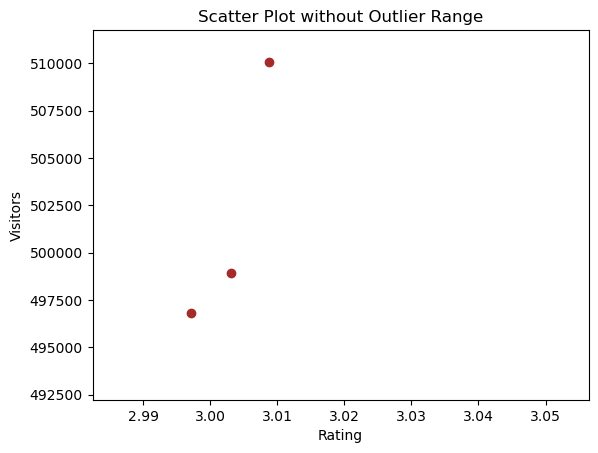

In [141]:
plt.scatter(resultant['Rating'], resultant['Visitors'], color='brown')
plt.xlim(resultant['Rating'].quantile(0.05), resultant['Rating'].quantile(0.95))
plt.ylim(resultant['Visitors'].quantile(0.05), resultant['Visitors'].quantile(0.95))
plt.xlabel('Rating')
plt.ylabel('Visitors')
plt.title('Scatter Plot without Outlier Range')
print("New correlation coefficient after filtering outliers:", new_correlation)
plt.show()

Correlation between Revenue and Visitors: 0.9330277807830154


<Axes: xlabel='Revenue', ylabel='Visitors'>

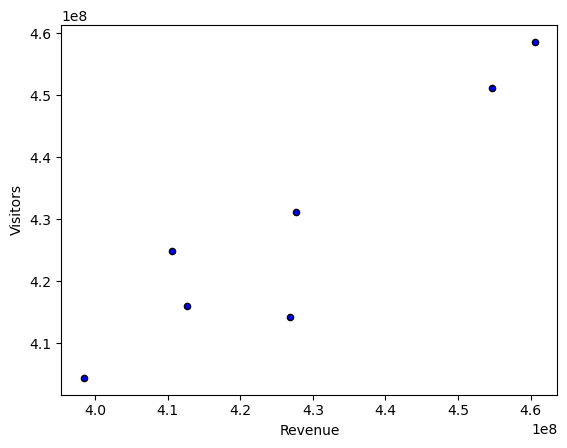

In [127]:
# Calculate the correlation between 'X' and 'Y'
correlation = result['Revenue'].corr(result['Visitors'])
print(f"Correlation between Revenue and Visitors: {correlation}")

# Plot the scatter plot
result.plot(kind='scatter', x='Revenue', y='Visitors',xlabel = 'Revenue',ylabel = 'Visitors', color='blue', edgecolor='black')

In [119]:
#High positive correlation.

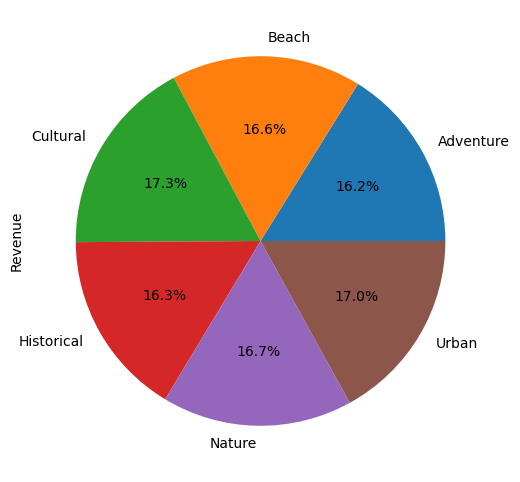

In [120]:
Category_Revenue.set_index('Category')['Revenue'].plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.show()

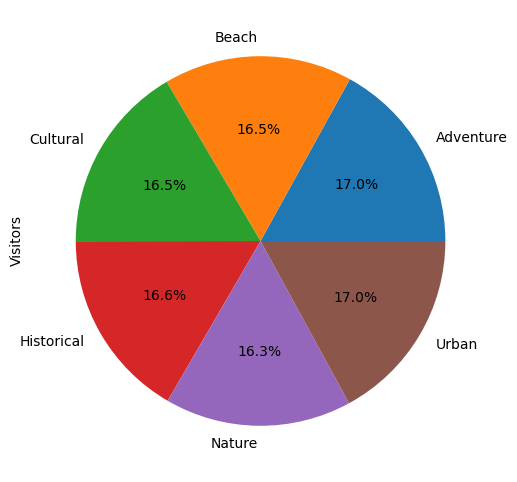

In [112]:
Category_Visitors.set_index('Category')['Visitors'].plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.show()